<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/k_meanclus_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv('/content/student_clustering.csv')

In [3]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


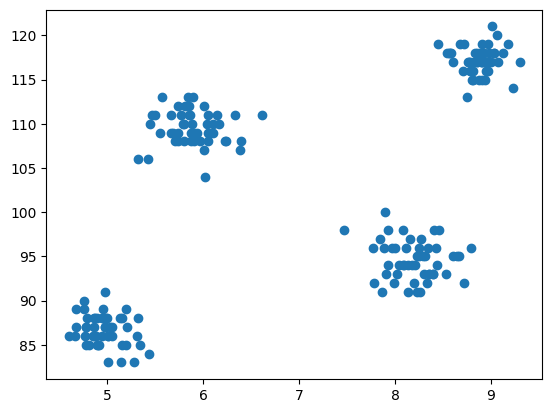

In [5]:
plt.scatter(df['cgpa'],df['iq'])

#Applying Elbow method

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [8]:
wcss

[29957.898287999997,
 4184.141269999999,
 2503.3975810000015,
 681.9696600000001,
 582.7491892238328,
 388.8524026875981,
 295.4391895943191,
 249.93816785875316,
 242.74046202257944,
 179.659272343604]

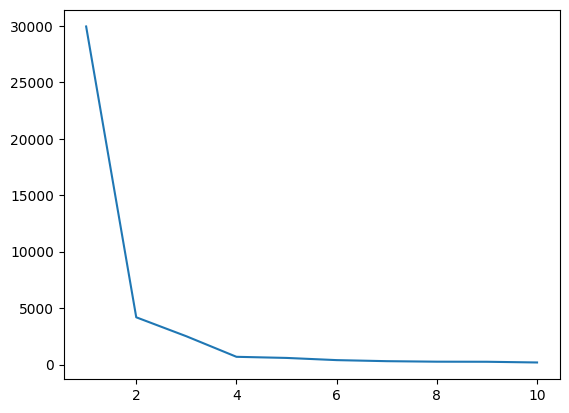

In [9]:
plt.plot(range(1,11),wcss)

#As we clearly see the 4 is the point where the steepness is coming and after this the steapness going to steady, and show the how many no.of clusters should be present...

In [11]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_mean = km.fit_predict(X)

In [12]:
y_mean

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0], dtype=int32)

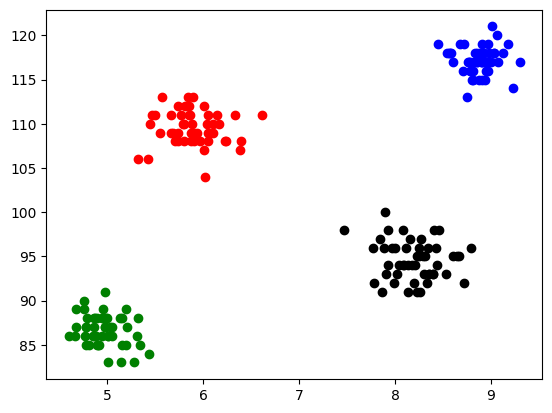

In [13]:
plt.scatter(X[y_mean == 0,0],X[y_mean == 0,1],color = 'blue')
plt.scatter(X[y_mean == 1,0],X[y_mean == 1,1],color = 'green')
plt.scatter(X[y_mean == 2,0],X[y_mean == 2,1],color = 'red')
plt.scatter(X[y_mean == 3,0],X[y_mean == 3,1],color = 'black')

#Applying K-Mean for 3D-Dataset..

In [15]:
from sklearn.datasets import make_blobs

In [16]:
centroids = [(-5,-5,-5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

In [19]:
X,y = make_blobs(n_samples = 200,cluster_std=cluster_std,
                 centers=centroids,n_features=3,random_state=1)

In [20]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237, -7.3015387 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935, -5.85951594],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314, -5.62000084],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358, -5.37528495],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 , -4.20719313],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229, -4.591

In [22]:
fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

In [24]:
wcss = []
for i in range(1,21):
  km = KMeans(n_clusters=i)
  km.fit_predict(X)
  wcss.append(km.inertia_)

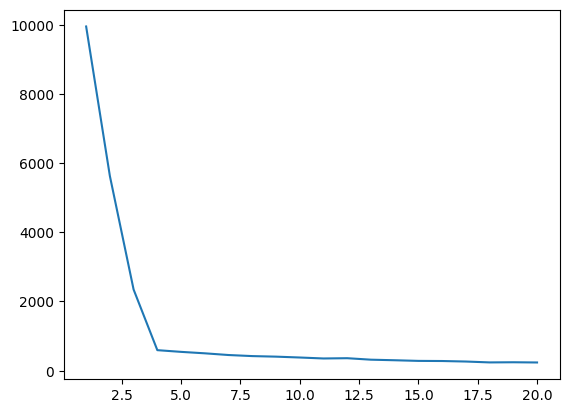

In [25]:
plt.plot(range(1,21),wcss)

In [26]:
km = KMeans(n_clusters = 4)
y_pred = km.fit_predict(X)


In [27]:
df = pd.DataFrame()

In [28]:
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [29]:
fig = px.scatter_3d(df,x='col1',y='col2',z ='col3',color ='label')
fig.show()